## Predicting the liked place for a user
Team:
- Arun Reddy Nalla 
- Darun Arumugham
- Kedareshwara Kartikeya Rao Pagadala

## Index
- Importing Libraries
- Importing Dataset
- Data Preprocessing
- Data Visualization
- Applying K means
- Prediction using KNN 
- Future Extension
- Conclusion

## Importing Libraries

Importing all the required libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## Importing Dataset

> Dataset: https://archive.ics.uci.edu/ml/datasets/Tarvel+Review+Ratings

In [2]:
df= pd.read_csv('./google_review_ratings.csv',index_col=0)
# reads ratings CSV into pandas using header 0 and names from the list above
df.shape
df

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
User,,,,,,,,,,,,,,,,,,,,,
User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN


In [3]:
#To get some general information of the imported dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5456 entries, User 1 to User 5456
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category 1   5456 non-null   float64
 1   Category 2   5456 non-null   float64
 2   Category 3   5456 non-null   float64
 3   Category 4   5456 non-null   float64
 4   Category 5   5456 non-null   float64
 5   Category 6   5456 non-null   float64
 6   Category 7   5456 non-null   float64
 7   Category 8   5456 non-null   float64
 8   Category 9   5456 non-null   float64
 9   Category 10  5456 non-null   float64
 10  Category 11  5456 non-null   object 
 11  Category 12  5455 non-null   float64
 12  Category 13  5456 non-null   float64
 13  Category 14  5456 non-null   float64
 14  Category 15  5456 non-null   float64
 15  Category 16  5456 non-null   float64
 16  Category 17  5456 non-null   float64
 17  Category 18  5456 non-null   float64
 18  Category 19  5456 non-null   float64
 19  C

## Data Preprocessing

In [4]:
#Checking if there are any null or empty values in the dataset
print(df.isna().sum())

Category 1        0
Category 2        0
Category 3        0
Category 4        0
Category 5        0
Category 6        0
Category 7        0
Category 8        0
Category 9        0
Category 10       0
Category 11       0
Category 12       1
Category 13       0
Category 14       0
Category 15       0
Category 16       0
Category 17       0
Category 18       0
Category 19       0
Category 20       0
Category 21       0
Category 22       0
Category 23       0
Category 24       1
Unnamed: 25    5454
dtype: int64


> There are 5454 null value present in gardens or 'unnamed: 25' column category so we decided to drop the 'unnamed: 25' column

In [5]:
df.drop('Unnamed: 25', axis = 1, inplace = True)
df.shape
df

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
User,,,,,,,,,,,,,,,,,,,,,
User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11


> Renaming the column names as given in UCI dataset 

The dataset which we are using is having the columns labeled as 'Category 1'......'Category n', as recomended by dataset description we have changed the column label's to given label names.

In [6]:
#Changing attribute names 
Columnsdata_google=[ 'churches' 
,'resorts' 
,'beaches' 
,'parks' 
,'theatres' 
,'museums' 
,'malls' 
,'zoo' 
,'restaurants' 
,'pubs/bars' 
,'local services' 
,'burger/pizza shops' 
,'hotels/other lodgings' 
,'juice bars'
,'art galleries' 
,'dance clubs' 
,'swimming pools' 
,'gyms' 
,'bakeries' 
,'beauty & spas' 
,'cafes' 
,'view points' 
,'monuments' 
,'gardens']

In [7]:
df.columns=Columnsdata_google
df.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
User,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [8]:
#checking for null values
df.isna().sum()

churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs/bars                0
local services           0
burger/pizza shops       1
hotels/other lodgings    0
juice bars               0
art galleries            0
dance clubs              0
swimming pools           0
gyms                     0
bakeries                 0
beauty & spas            0
cafes                    0
view points              0
monuments                0
gardens                  1
dtype: int64

After using .isnull() or in other words .isna() function we have discovered that there is 1 null of empty value in 2 categories which are 'burger/pizza shops ' and 'gardens  '.

Anyday null values can cause irregular behaviour of ML model, in order to reduce this behaviour we have used mode method to fill the null or empty values.

mode uses the most frequently occured value in missing value.

We are having 2 methods to deal with null value 
1. Replacing null values with mean 
2. Replacing null values with mode

### Mean=(sum of all values)/(Number of values)
### Mode uses the most frequently occured value in missing value.
 


- we have decided to go with mean 

In [9]:
df['gardens'].fillna(df['gardens'].mean(), inplace=True)
df['burger/pizza shops'].fillna(df['burger/pizza shops'].mean(), inplace=True)

In [10]:
#checking for null values after filling null values with mean
df.isna().sum()

churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs/bars                0
local services           0
burger/pizza shops       0
hotels/other lodgings    0
juice bars               0
art galleries            0
dance clubs              0
swimming pools           0
gyms                     0
bakeries                 0
beauty & spas            0
cafes                    0
view points              0
monuments                0
gardens                  0
dtype: int64

- we having 0 null values which reprensts we are good to move for further steps.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5456 entries, User 1 to User 5456
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   churches               5456 non-null   float64
 1   resorts                5456 non-null   float64
 2   beaches                5456 non-null   float64
 3   parks                  5456 non-null   float64
 4   theatres               5456 non-null   float64
 5   museums                5456 non-null   float64
 6   malls                  5456 non-null   float64
 7   zoo                    5456 non-null   float64
 8   restaurants            5456 non-null   float64
 9   pubs/bars              5456 non-null   float64
 10  local services         5456 non-null   object 
 11  burger/pizza shops     5456 non-null   float64
 12  hotels/other lodgings  5456 non-null   float64
 13  juice bars             5456 non-null   float64
 14  art galleries          5456 non-null   float64
 15 

- We can see that there is an entire data column local services which is of the type object.

In [12]:
#Converting the column 'local services' to float datatype
df['local services'].astype('float')

ValueError: could not convert string to float: '2\t2.'

> ValueError: could not convert string to float: '2\t2.' 

    There is a ValueError when we are trying to convert the data into the float form, since it is containing a '2\t2' string which can't be changed into a float value.

> In order to solve this issue the process we decided to do is Replace the string value by mean of the column data

In [16]:
#Identifying if the data of '2\t2' exists?
df['local services'][df['local services'] == '2\t2.']

Series([], Name: local services, dtype: float64)

In [17]:
meanValue = df['local services'][df['local services'] != '2\t2.']
#Replaces the '2\t2' value by the mean of rest of the column values
df['local services'][df['local services'] == '2\t2.'] = np.mean(meanValue.astype('float64'))
df['local services'] = df['local services'].astype('float')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5456 entries, User 1 to User 5456
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   churches               5456 non-null   float64
 1   resorts                5456 non-null   float64
 2   beaches                5456 non-null   float64
 3   parks                  5456 non-null   float64
 4   theatres               5456 non-null   float64
 5   museums                5456 non-null   float64
 6   malls                  5456 non-null   float64
 7   zoo                    5456 non-null   float64
 8   restaurants            5456 non-null   float64
 9   pubs/bars              5456 non-null   float64
 10  local services         5456 non-null   float64
 11  burger/pizza shops     5456 non-null   float64
 12  hotels/other lodgings  5456 non-null   float64
 13  juice bars             5456 non-null   float64
 14  art galleries          5456 non-null   float64
 15 

## Data Visualization

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
churches,5456.0,1.455720,0.827604,0.00,0.92,1.340,1.8100,5.0
resorts,5456.0,2.319707,1.421438,0.00,1.36,1.905,2.6825,5.0
beaches,5456.0,2.489331,1.247815,0.00,1.54,2.060,2.7400,5.0
parks,5456.0,2.796886,1.309159,0.83,1.73,2.460,4.0925,5.0
theatres,5456.0,2.958941,1.339056,1.12,1.77,2.670,4.3125,5.0
museums,5456.0,2.893490,1.282400,1.11,1.79,2.680,3.8400,5.0
malls,5456.0,3.351395,1.413492,1.12,1.93,3.230,5.0000,5.0
zoo,5456.0,2.540795,1.111391,0.86,1.62,2.170,3.1900,5.0
restaurants,5456.0,3.126019,1.356802,0.84,1.80,2.800,5.0000,5.0
pubs/bars,5456.0,2.832729,1.307665,0.81,1.64,2.680,3.5300,5.0


<AxesSubplot:>

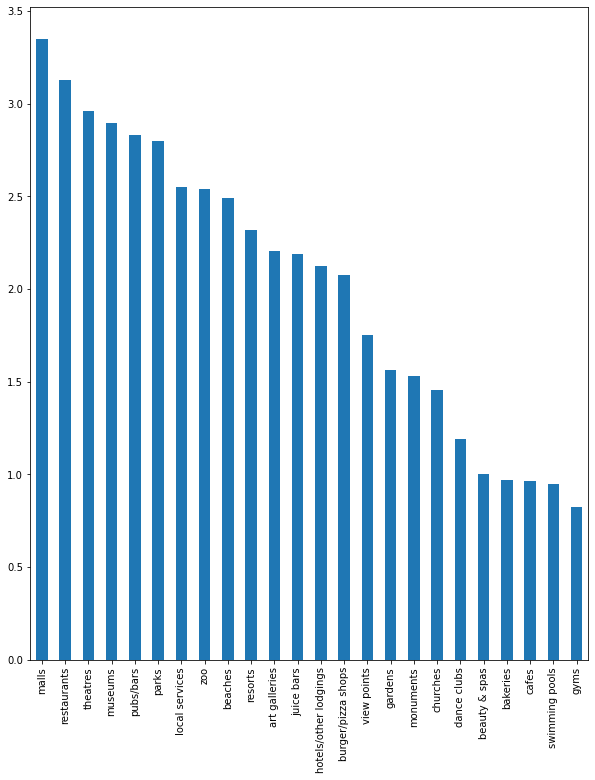

In [20]:
#Plotting Average data
#round(3) to get rounded number of 3
grap=df.mean(axis=0).round(3)
grap=grap.sort_values(ascending=False)
#plotting bar graph
fig = plt.subplots (figsize = (10, 12))
grap.plot.bar()

> From the above graph it is clear that 
    
        - Malls are most favourite places with mean value of 3.351395 ≈ 3.35
        - Gyms are least favourite places with mean value of  0.822414 ≈ 0.82

In [21]:
# counting the percentage of people liked every place
mostLike = []
for col in df[1:]:
    mark = (df[col] >= 2)
    try:
        ratio = (mark.value_counts()[True] / (mark.value_counts()[False]+mark.value_counts()[True]))*100
        print(str(round(ratio,2)) + '% of users have ratedd an average or above for', col)
        if ratio > 50:
            mostLike.append(col)
    except:
        print('100% of users considered near average or above for', col)

20.66% of users have ratedd an average or above for churches
48.68% of users have ratedd an average or above for resorts
53.83% of users have ratedd an average or above for beaches
62.87% of users have ratedd an average or above for parks
64.35% of users have ratedd an average or above for theatres
64.81% of users have ratedd an average or above for museums
73.08% of users have ratedd an average or above for malls
55.41% of users have ratedd an average or above for zoo
71.19% of users have ratedd an average or above for restaurants
66.33% of users have ratedd an average or above for pubs/bars
50.11% of users have ratedd an average or above for local services
34.0% of users have ratedd an average or above for burger/pizza shops
29.53% of users have ratedd an average or above for hotels/other lodgings
30.92% of users have ratedd an average or above for juice bars
32.17% of users have ratedd an average or above for art galleries
8.76% of users have ratedd an average or above for dance clu

In [22]:
print('Attractions that most people think are near average or above:\n') 
df[mostLike]

Attractions that most people think are near average or above:



,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,local services
User,,,,,,,,,
User 1,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.70
User 2,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.70
User 3,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70
User 4,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73
User 5,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70
...,...,...,...,...,...,...,...,...,...
User 5452,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,1.02
User 5453,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,1.01
User 5454,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,0.99


In [23]:
mostLike

['beaches',
 'parks',
 'theatres',
 'museums',
 'malls',
 'zoo',
 'restaurants',
 'pubs/bars',
 'local services']

### Plotting average rating for each category 

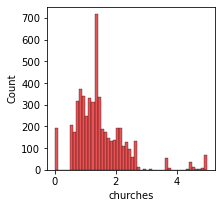

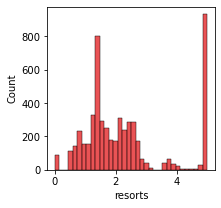

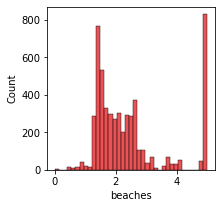

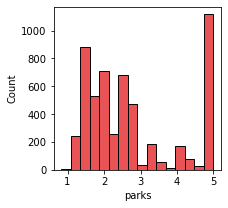

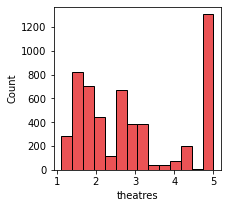

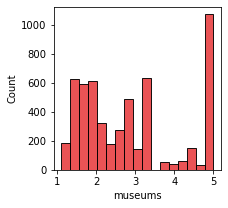

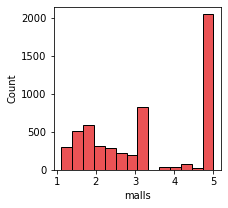

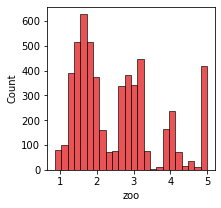

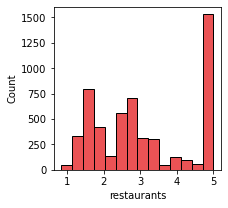

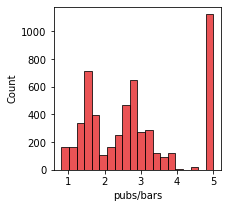

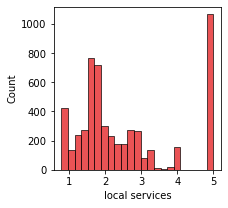

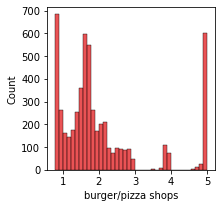

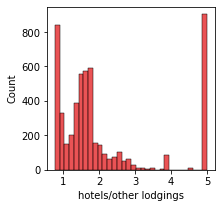

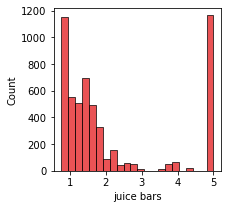

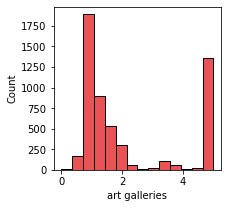

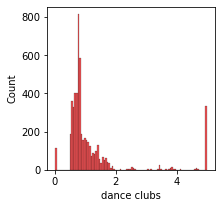

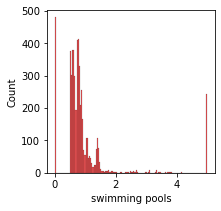

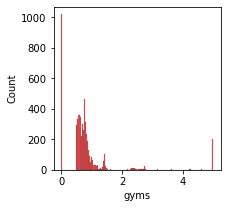

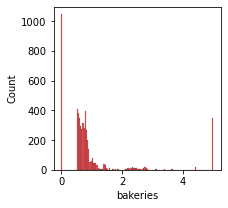

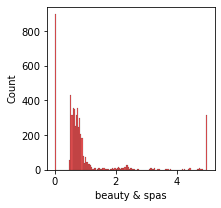

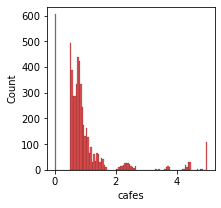

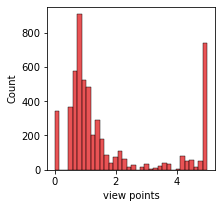

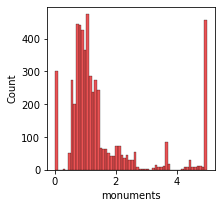

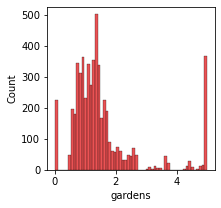

In [24]:
for column in df.columns:
    his = plt.subplots(figsize=(3, 3))
    his = sns.histplot(x = column, data = df, color = sns.color_palette("Set1", 1))
    plt.show()

#### Ploting an Outliner 

- Outliers plays a vital role in any data related projects

- An outlier is a data object that deviates significantly from the rest of the objects, as if it were generated by a different mechanism.

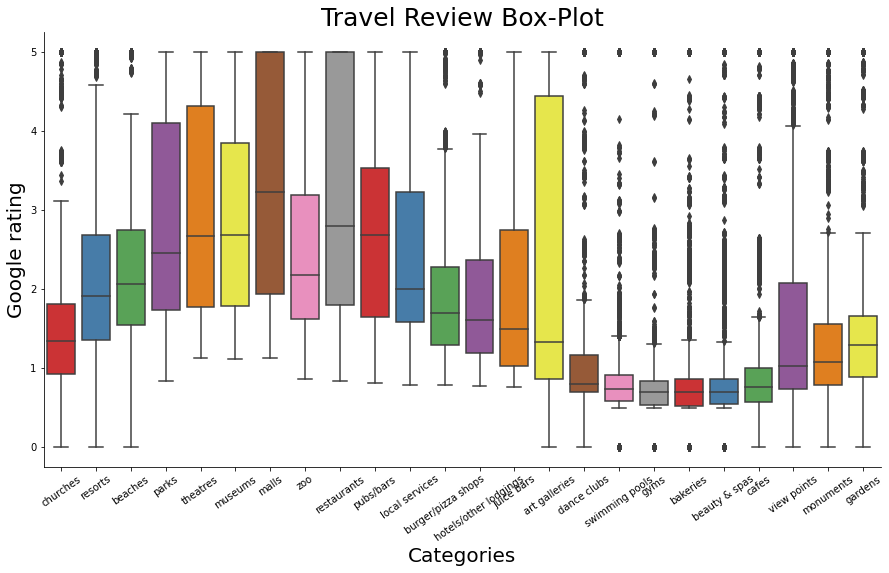

In [25]:
boxplot = plt.subplots(figsize=(15, 8))

boxplot = sns.boxplot(data= df, palette="Set1") #Paired

sns.despine()
boxplot.set_xlabel('Categories', fontsize = 20)
boxplot.set_ylabel('Google rating', fontsize = 20)
boxplot.set_title('Travel Review Box-Plot', fontsize = 25)

plt.xticks(rotation= 35)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130944 entries, 0 to 130943
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   variable  130944 non-null  object 
 1   value     130944 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.0+ MB


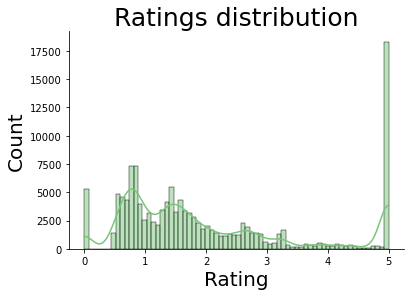

In [26]:
#for all of this we should create new table - melted, it would help us in analysis
df_melted = pd.melt(df)

df_melted

#everything was melt right, we didn't lost information, but only 

df_melted.info()

histplot_rating = sns.histplot(data = df_melted,
             x = 'value',
             color = sns.color_palette("YlGn", 1),
             kde = True)

sns.despine()
histplot_rating.set_xlabel('Rating', fontsize = 20)
histplot_rating.set_ylabel('Count', fontsize = 20)
histplot_rating.set_title('Ratings distribution', fontsize = 25)


plt.show()

> The two major outlier seen from the outputs are,
- Rating 0 (about 5,000)
- Rating 5 (about 17,500) 

In our opinion these are true reviews, because people usually rate places, which they really like and don't rate, if they were  disappointed.

We can't consider these two rating as outliers because these might be the true reviews. Pratically, many users will give rating-5 for their most favourite place and rating-0 if they find it disappointing. So ignoring these data points will affect the model.

#### Plotting correlation 
        
  - Plotting heatmap to find correlation

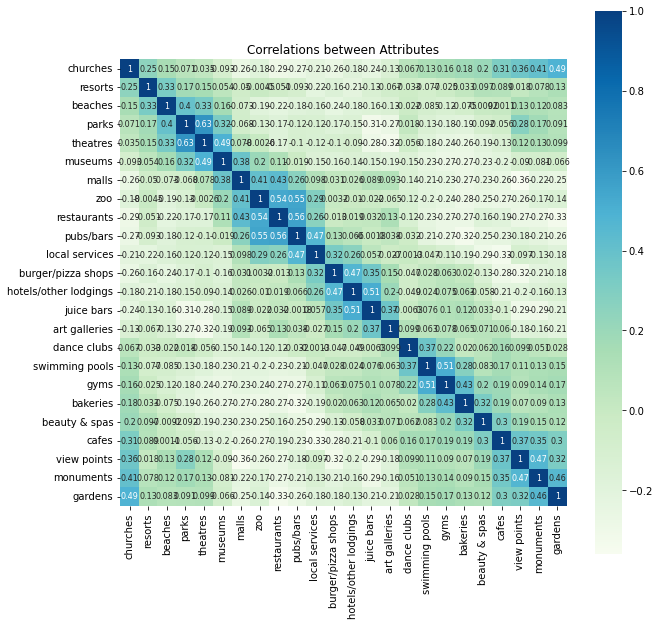

In [27]:
#correlation btw features and target variable by plotting heatmap:
fig = plt.subplots (figsize = (10, 10))
sns.heatmap(df.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show ()

- Printing top 3 correlation values

In [28]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]*100

print("Top Absolute Correlations\n")
print(get_top_abs_correlations(df, 3))

Top Absolute Correlations

parks        theatres     62.686781
restaurants  pubs/bars    56.408629
zoo          pubs/bars    55.140901
dtype: float64


- we’re looking at the ratings as a whole. We’re going to bring all the classes together, and we’re going to look at, in general, how people rate places. No matter where they were.

## Applying the K-Means Clustering

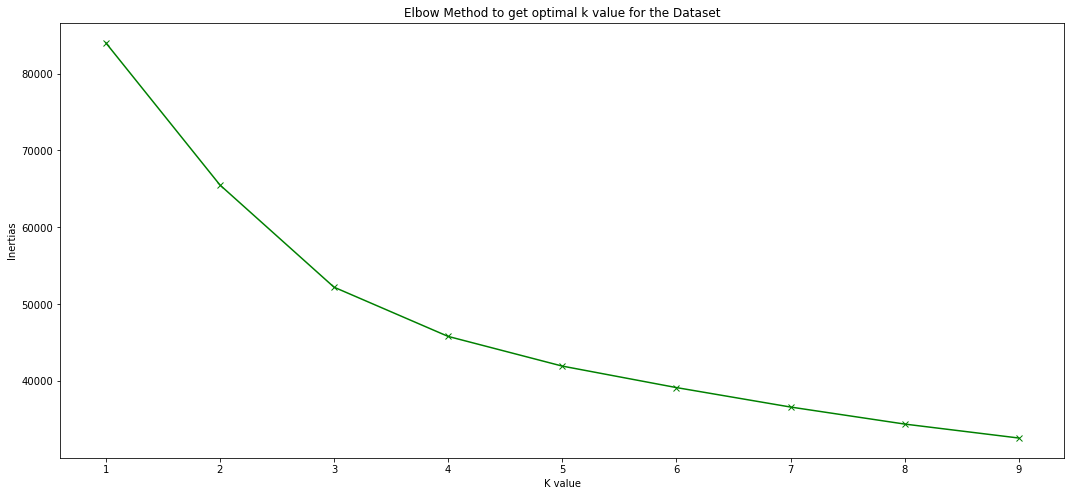

In [29]:
new = df[mostLike]
inertias = []
for i in range(1,10): # run the algo 1-10 to plot inertias 
    model = KMeans(n_clusters=i) 
    model.fit(new) # run mode for current k
    inertias.append(model.inertia_)
plt.figure(figsize=(18,8))
plt.plot(range(1,10), inertias, 'gx-')
plt.title('Elbow Method to get optimal k value for the Dataset')
plt.xlabel('K value')
plt.ylabel('Inertias')
plt.show()

In [30]:
kmeans = KMeans(n_clusters=3) # set clusters = 3
kmeans.fit(new) # run model
clusterNames = kmeans.labels_


X = new
y = clusterNames
target_names = [0,1,2]

pca = PCA(n_components=2) # reduce dimesions of the data using PCA and LDA
X_r = pca.fit(X).transform(X)

In [31]:
X

,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,local services
User,,,,,,,,,
User 1,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.70
User 2,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.70
User 3,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70
User 4,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73
User 5,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.70
...,...,...,...,...,...,...,...,...,...
User 5452,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,1.02
User 5453,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,1.01
User 5454,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,0.99


In [32]:
clusterNames

array([1, 1, 1, ..., 0, 0, 0])

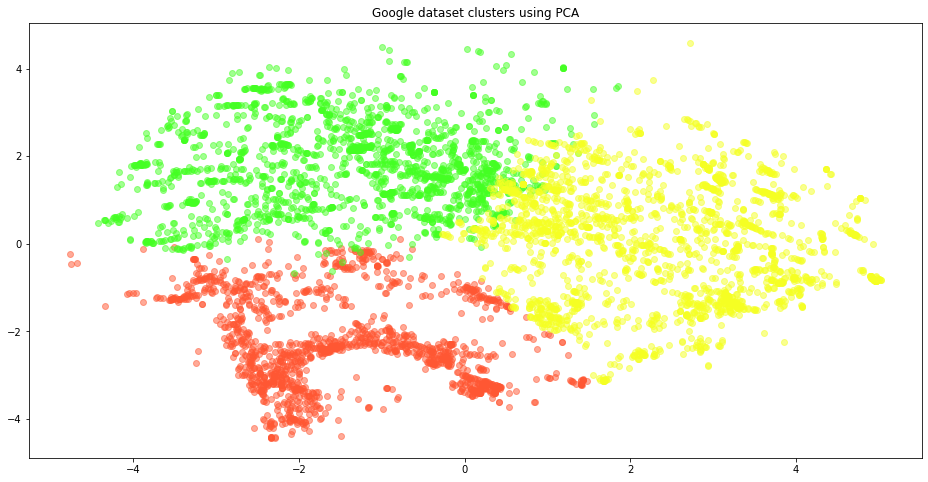

In [33]:
plt.figure(figsize=(16,8))

colors = ['#FF5733', '#44FF23', '#F5FF23',]

for color, i, target_name in zip(colors, range(0,4), target_names): # plot clusters
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.5,
                label=target_name)

plt.title('Google dataset clusters using PCA')

plt.show()

In [34]:
people = list(clusterNames)

zero = [] # Yellow cluster
one = []
two = []

for i in range(len(people)):
    if people[i] == 0:
        zero.append(i)
    elif people[i] == 1:
        one.append(i)
    else:
        two.append(i)

In [35]:
new.iloc[zero].mean().round(4) # green cluster

beaches           2.4241
parks             2.2054
theatres          2.0346
museums           1.8720
malls             2.0150
zoo               1.6508
restaurants       2.0795
pubs/bars         1.8698
local services    1.8755
dtype: float64

In [36]:
new.iloc[one].mean().round(4) # yellow cluster

beaches           3.1853
parks             4.0373
theatres          4.4046
museums           3.7535
malls             3.4498
zoo               2.3331
restaurants       2.7326
pubs/bars         2.5890
local services    2.2721
dtype: float64

In [37]:
new.iloc[two].mean().round(4) # orange cluster

beaches           1.9060
parks             2.1009
theatres          2.3178
museums           2.8532
malls             4.2290
zoo               3.3728
restaurants       4.2395
pubs/bars         3.7502
local services    3.2899
dtype: float64

> Because we are in an unsupervised learning environment, at some point, a human with domain expertise will need to intervene to label the clusters.
By this above we can conclude that 
 - Green Cluster
     
     Users in cluster green like Theatres,Parks and musems,etc so we can recomend them places similar to it.
     
     
 - Yellow Cluster
     
     Here mostly users like restaurants, malls and zoo's so we can recomend users in this cluster places similar to these.
     
     
 - orange Cluster
     
     Majority here like beaches, parks and restaurants.

## Predicting ratings

In [38]:
kNData = df[mostLike]

features = [ # set up features 
    'beaches',
 'local services',
 'malls',
 'museums',
 'parks',
 'pubs/bars',
 'theatres',
 'zoo'
]

xTrainDict = kNData[features].to_dict(orient='records') # defining training data
yTrain = kNData['restaurants'] # what we want to find out 

vec = DictVectorizer(sparse=False)
scaler = StandardScaler()

(2, 0.4266359172449915)


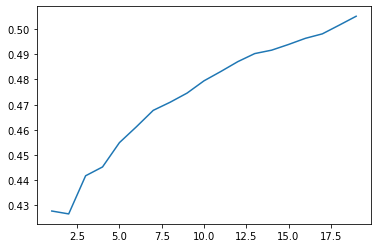

In [39]:
average = 0
MAE = {}
high = (0,99)
for i in range(1,20):
    model = KNeighborsRegressor(n_neighbors=i)
    pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])
    scores = -cross_val_score(pipeline, xTrainDict, yTrain, cv=5, scoring="neg_mean_absolute_error") # run pipeline with 5 folds 
    MAE[i]=scores.mean() # find mean to plot easily 
    if scores.mean() < high[1]: #store value if lower 
        high = (i,scores.mean()) 
print(high)
plt.plot(*zip(*sorted(MAE.items()))) # plot all items 
plt.show()

To create a model that generalizes well to new data, we conducted a k-nearest-neighbors regression with 5-fold crossvalidation. We tested K's 1-20 and found that the optimal K to minimize MAE was 2. However the MAE is somewhat high at 0.42 meaning that on average our prediciction is off by about 10% of the range of possible scores. This leads to some predictability, but a different model could improve upon this result.

## Future extension

We can use this model for developing a mobile application or web application which can record or learn what type of places a user likes to visit and based on the users reviews it can suggest best possible places for user using the machine learning model.

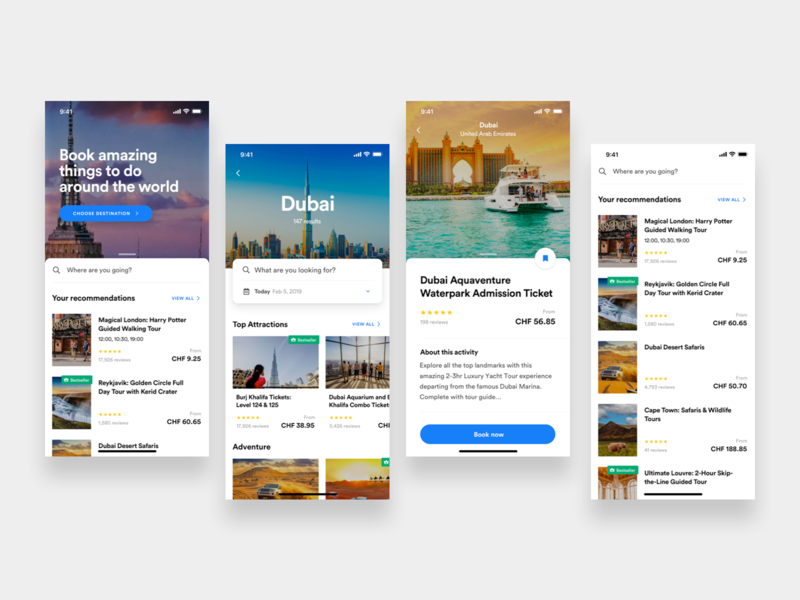

## Conclusion

- K means clustering has sucessfully helped to make clusters and divide users based on their taste of visiting places.

- By using the K means we were able to get predictions close to expected result but by using other methods for prediction the chances might increase to make the prediction almost similar to the expected value.

- After completing the project we came to a conclusion that we can use this kind of datasets of various locations and make a model which would be capable of predicting the places which can have high chances of liking by a user based on the inputs provided.

